<a href="https://colab.research.google.com/github/sandeshhalappagol/Capstone-Project-1/blob/main/Hotel_booking_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Have you ever wondered when the best time of year to book a hotel room is? Or
the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
Explore and analyze the data to discover important factors that govern the bookings.


In [ ]:
# Importing all import python libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
%matplotlib inline

In [ ]:
from google.colab import drive                    # Mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hotel_df= pd.read_csv('/content/drive/MyDrive/eda /Hotel_booking_analysis /Hotel_Bookings.csv')

In [ ]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Understanding statistical data summaries

In [ ]:
hotel_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
print(f"No. of duplicate rows: {hotel_df[hotel_df.duplicated()].shape[0]}")

No. of duplicate rows: 31994


In [ ]:
# Creating a copy of dataframe

hotel_df1 = hotel_df.copy()

In [ ]:

# Dropping duplicate values
hotel_df.drop_duplicates(inplace = True)
duplicate_missing_data_perc = pd.DataFrame([hotel_df.isnull().sum(),hotel_df.isnull().sum()*100.0/hotel_df.shape[0]]).T
duplicate_missing_data_perc.columns = ['No. of Missing Data', '% Missing Data']
duplicate_missing_data_perc

,No. of Missing Data,% Missing Data
hotel,0.0,0.000000
is_canceled,0.0,0.000000
lead_time,0.0,0.000000
arrival_date_year,0.0,0.000000
arrival_date_month,0.0,0.000000
arrival_date_week_number,0.0,0.000000
arrival_date_day_of_month,0.0,0.000000
stays_in_weekend_nights,0.0,0.000000
stays_in_week_nights,0.0,0.000000
adults,0.0,0.000000


In [ ]:
# Columns having missing values.
missing_value=hotel_df.isnull().sum().sort_values(ascending = False)
print(missing_value[:4])

company     82137
agent       12193
country       452
children        4
dtype: int64


Company column has more missing values followed by agent,country,children

Handling missing values

In [ ]:
hotel_df[['company','agent']] = hotel_df[['company','agent']].fillna(0)
hotel_df['children'].fillna(hotel_df['children'].mean(), inplace = True)
hotel_df['country'].fillna('others', inplace = True)

In [ ]:
hotel_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

Converting columns to appropriate datatypes.

In [ ]:

# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
hotel_df[['children', 'company', 'agent']] = hotel_df[['children', 'company', 'agent']].astype('int64')


# changing datatype of column 'reservation_status_date' to data_type.
hotel_df['reservation_status_date'] = pd.to_datetime(hotel_df['reservation_status_date'], format = '%Y-%m-%d')


# Adding total stay hotel days in hotels
hotel_df['total_stays_hotel'] = hotel_df['stays_in_weekend_nights']+hotel_df['stays_in_week_nights']

# Adding total people as column, i.e. total people =  adults + children + babies
hotel_df['total_people'] = hotel_df['adults']+hotel_df['children']+hotel_df['babies']

We are adding this column so that we can analyse the stay length at hotels.

In [ ]:

#Removing rows where total is 0.
hotel_df.drop(hotel_df[hotel_df.adults + hotel_df.babies + hotel_df.children == 0].index, inplace = True)

Correlation Analysis:

<Axes: >

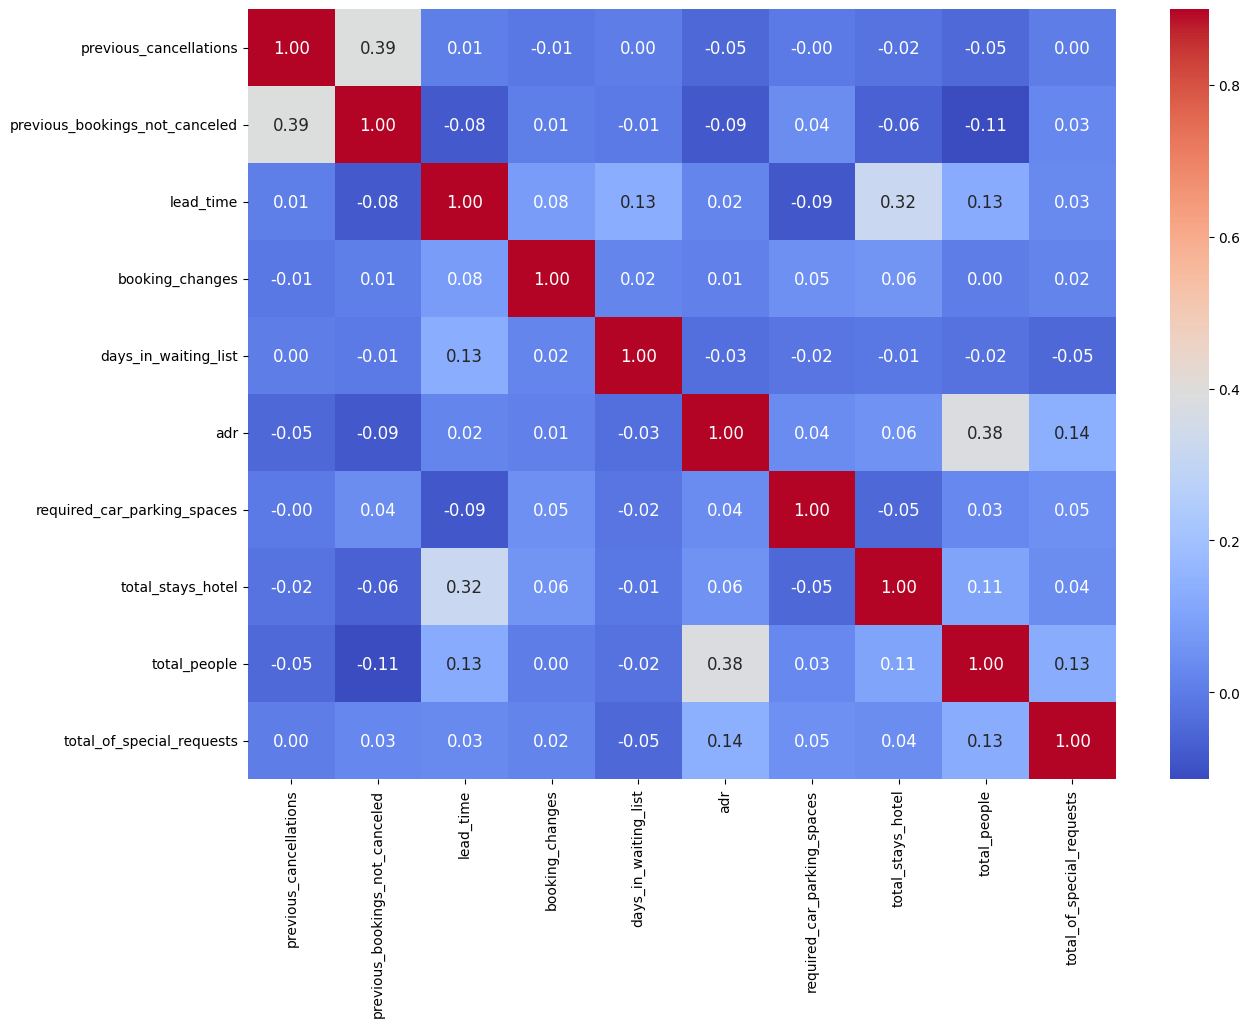

In [ ]:
numeric = hotel_df[['previous_cancellations','previous_bookings_not_canceled','lead_time','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_stays_hotel','total_people','total_of_special_requests']]


co_relation_matrix = numeric.corr()
f, ax = plt.subplots(figsize=(14,10))
sns.heatmap(co_relation_matrix, fmt='.2f',cmap='coolwarm',annot = True, annot_kws={'size': 12},  vmax = .9 )

<Axes: >

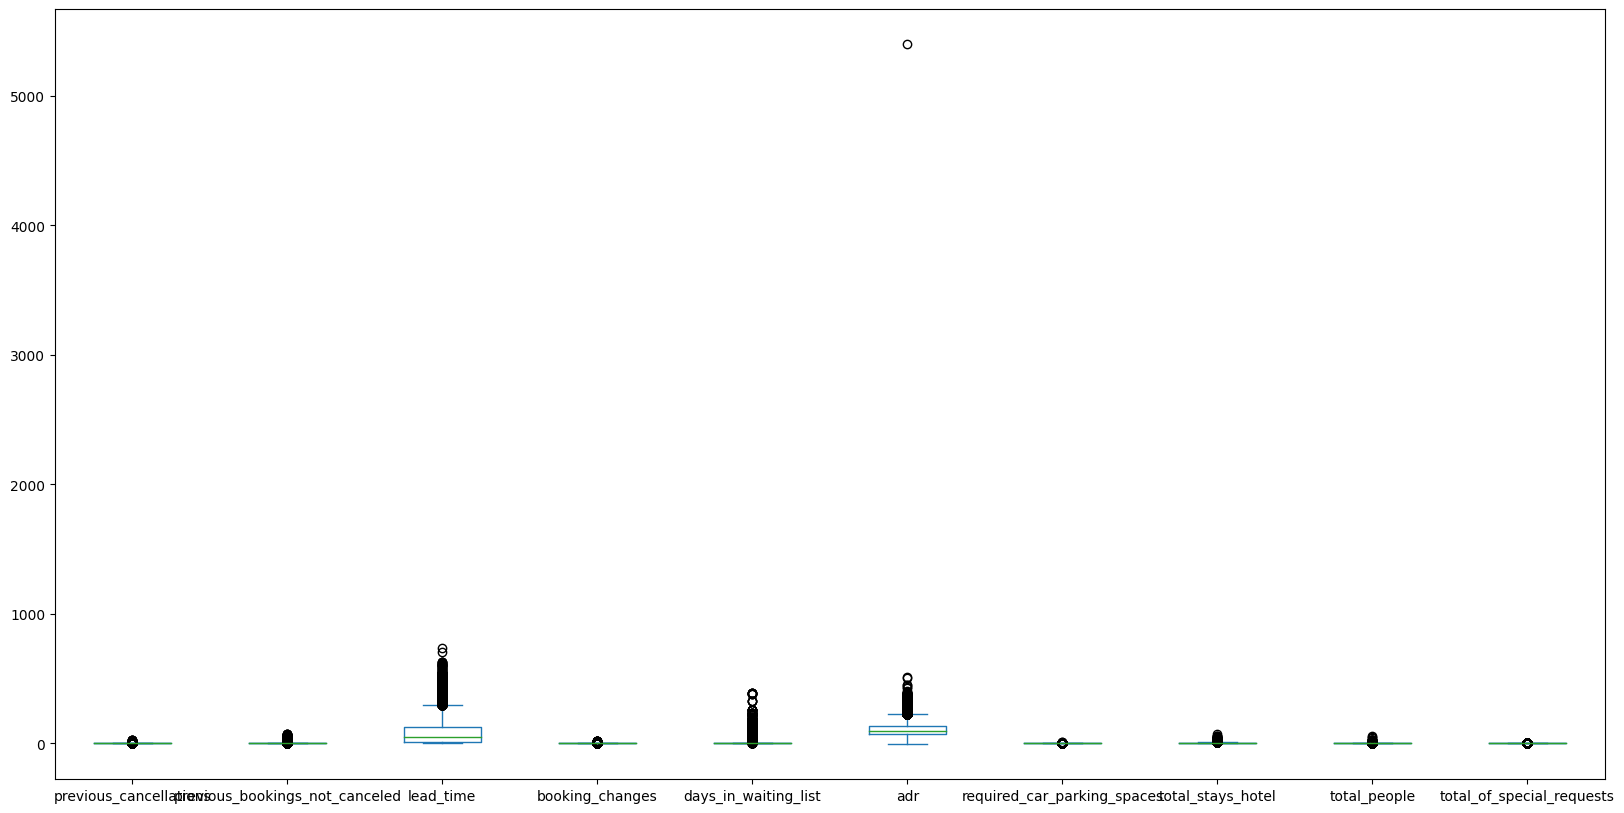

In [ ]:

#identifing the outliners
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
numeric.plot(kind = 'box')

As we have found the outlier in adr above value greater than 5000 that needed to be removed.

In [ ]:
# Removing the outlier from dataset
hotel_df.drop(hotel_df[hotel_df['adr'] > 5000].index, inplace = True)

HOTEL

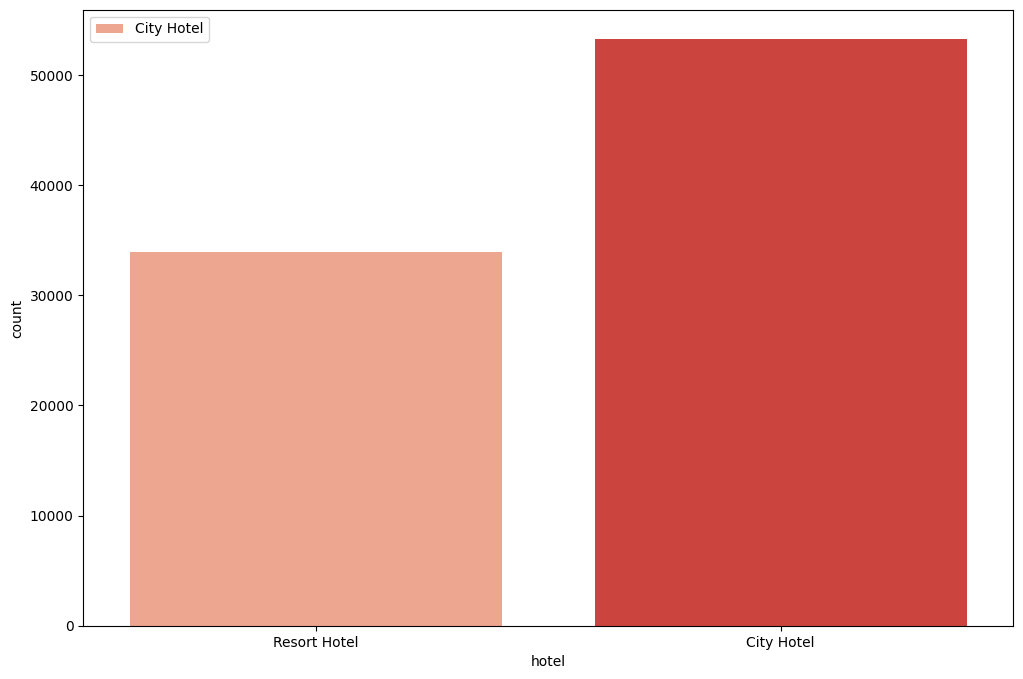

In [ ]:
#Hotel
plt.figure(figsize=(12,8))
sns.countplot(data=hotel_df,x='hotel', palette='Reds')
plt.legend(['City Hotel', 'Resort Hotel'])

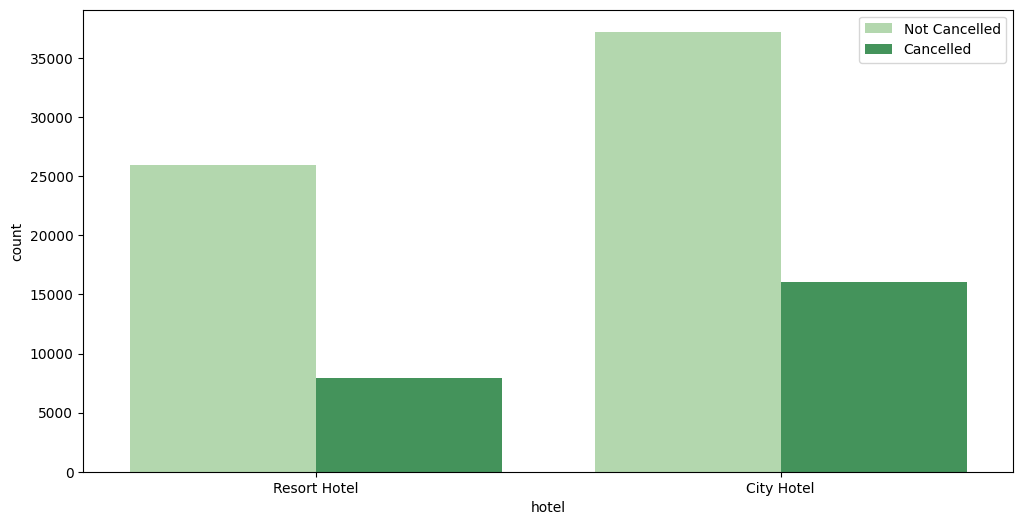

In [ ]:
#Hotel cancellations
plt.figure(figsize=(12,6))
sns.countplot(data=hotel_df,x='hotel',hue='is_canceled', palette='Greens')
plt.legend(['Not Cancelled', 'Cancelled'])

Often times, people come from all over the world to stay at a hotel so that they can tour around the place that they are staying. They do not spend their day in the hotel and they only come back to sleep and shower, maybe a meal or two. In general, hotels despite having the amenities and luxuries similar to these of resorts are more a place to stay and not a destination.
Oftentimes, resorts are located in scenic areas but not near a city or anything really. People visit a resort to get away from other people and cities. They stay in the resort and probably don’t travel around as they may do when staying at a city hotel. A resort is the destination.
City hotel has 53000 bookings and Resort hotel has 33000 bookings.
A city hotel is the best as more customer book and stay at this hotel than compare to resort hotels.
More cancellations in city hotels than at resort hotels
City hotels receive more reservations since they are not considered destinations and are chosen by travellers as a location to spend the night rather than resort hotels, which are seen as a point of distinction and where guests stay for extended periods of time.

Arrival date year

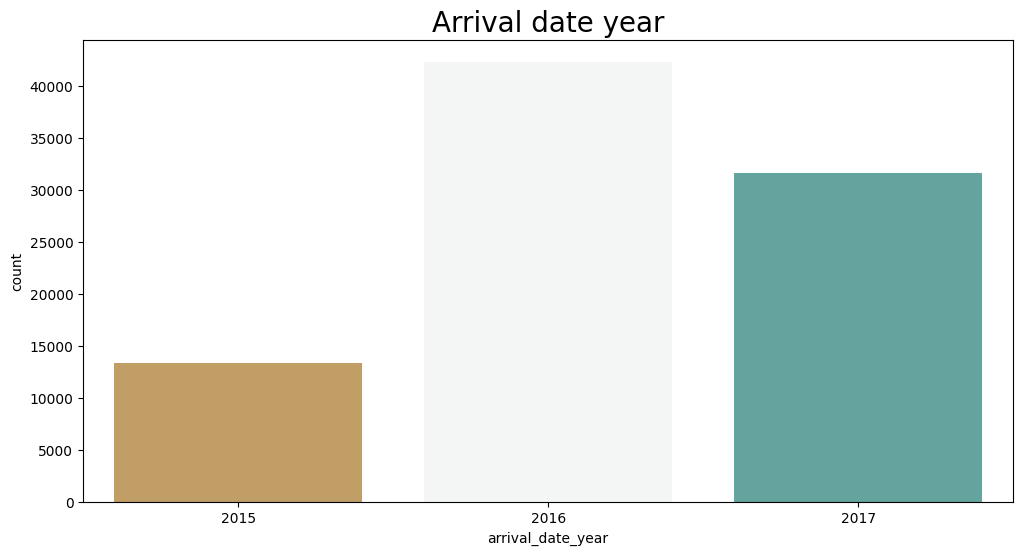

In [ ]:
#Arrival date year
plt.figure(figsize=(12,6))
sns.countplot(data=hotel_df, x='arrival_date_year', palette='BrBG')
plt.title("Arrival date year", fontsize = 20)
plt.show()

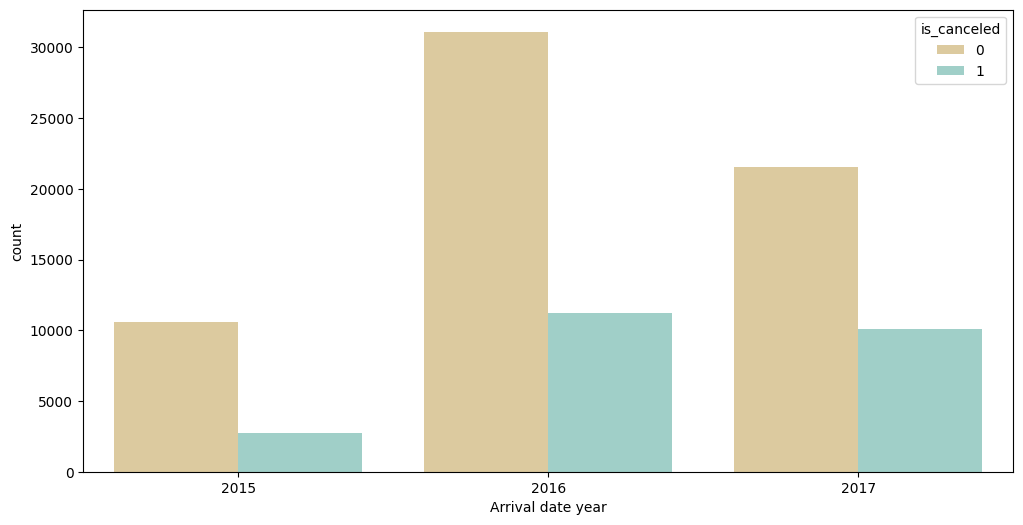

In [ ]:
#arrival date year cancellations
plt.figure(figsize=(12,6))
sns.countplot(x = 'arrival_date_year', hue='is_canceled',palette='BrBG',data=hotel_df)
plt.xlabel("Arrival date year")
plt.show()

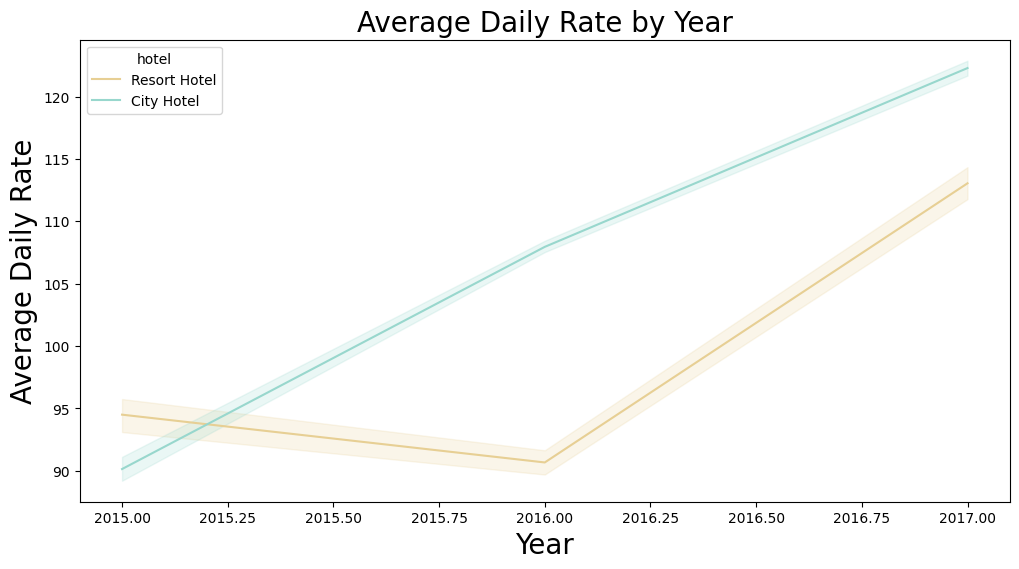

In [ ]:
#Average Daily Rate by Year
plt.figure(figsize = (12,6))
ax = sns.lineplot(x = 'arrival_date_year', y = 'adr' ,hue='hotel',palette='BrBG',data=hotel_df)
ax.set_xlabel('Year', fontsize = 20)
ax.set_ylabel('Average Daily Rate', fontsize = 20)
ax.set_title('Average Daily Rate by Year', fontsize = 20)
plt.show()

In 2016, there were more guests booking hotels followed by 2017 and 2015.
More cancellations of hotels in the year 2016 than compare to other years.
Year over year,average daily rate of hotels is increasing which means as the business grows, average daily price increases

Arrival date month

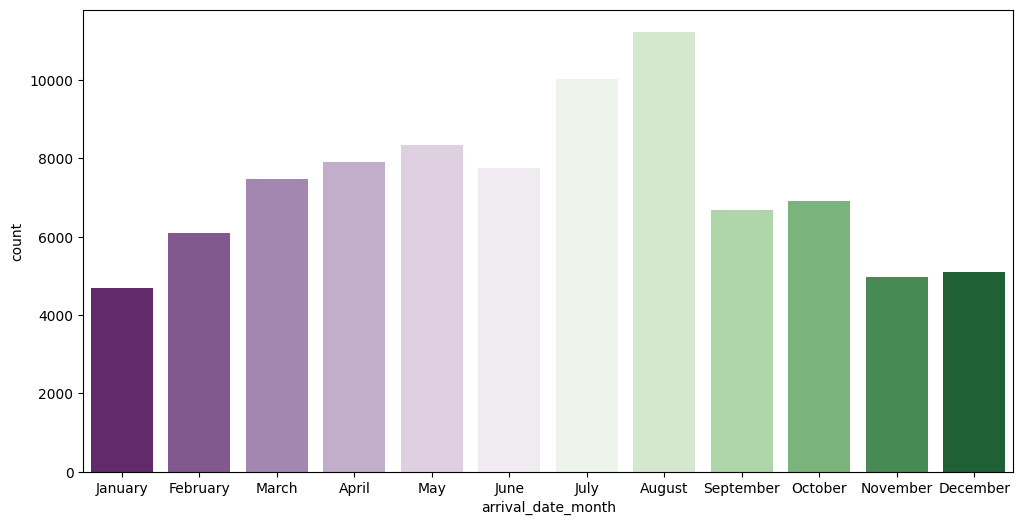

In [ ]:
#arrival date month
plt.figure(figsize=(12,6))
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
sns.countplot(data=hotel_df, x='arrival_date_month', palette='PRGn',order=months)
plt.show()

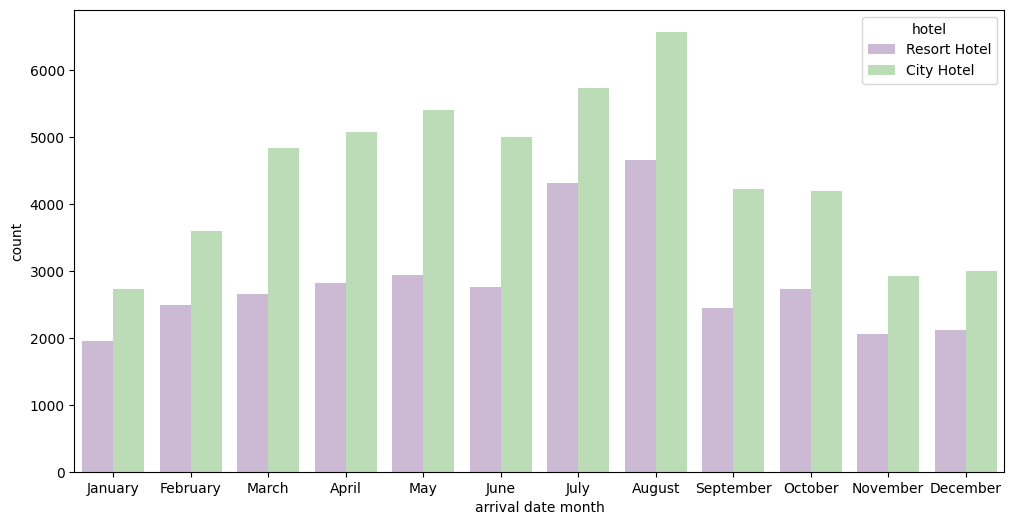

In [ ]:
#arrival date month in hotel
plt.figure(figsize=(12,6))
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
sns.countplot(x='arrival_date_month',hue='hotel',palette='PRGn',order=months,data=hotel_df)
plt.xlabel("arrival date month")
plt.show()

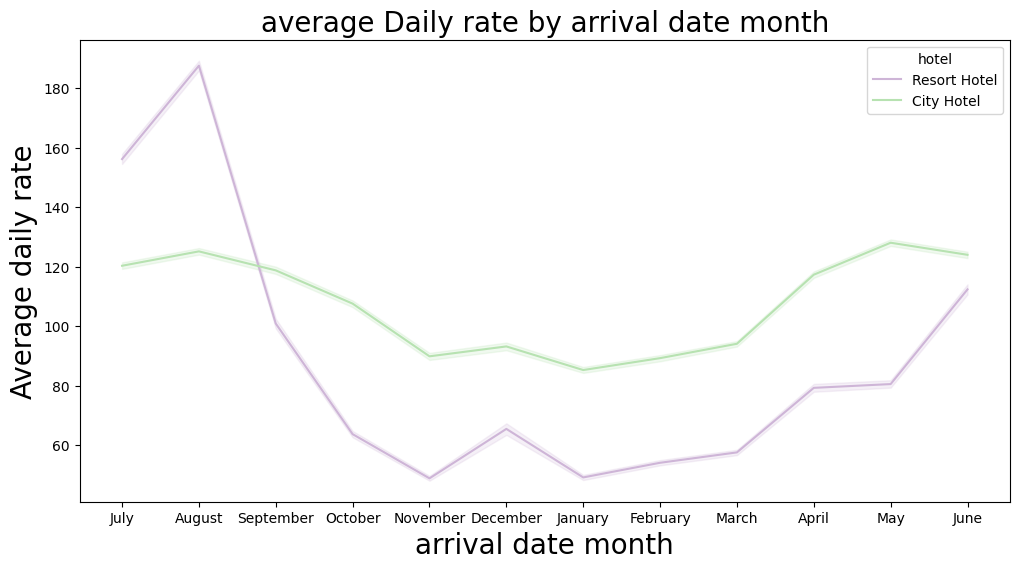

In [ ]:
#Average Daily rate by arrival date month
plt.figure(figsize = (12,6))
ax = sns.lineplot(x = 'arrival_date_month', y = 'adr' ,hue='hotel',palette='PRGn',data=hotel_df)
ax.set_xlabel('arrival date month', fontsize = 20)
ax.set_ylabel('Average daily rate', fontsize = 20)
ax.set_title('average Daily rate by arrival date month', fontsize = 20)
plt.show()

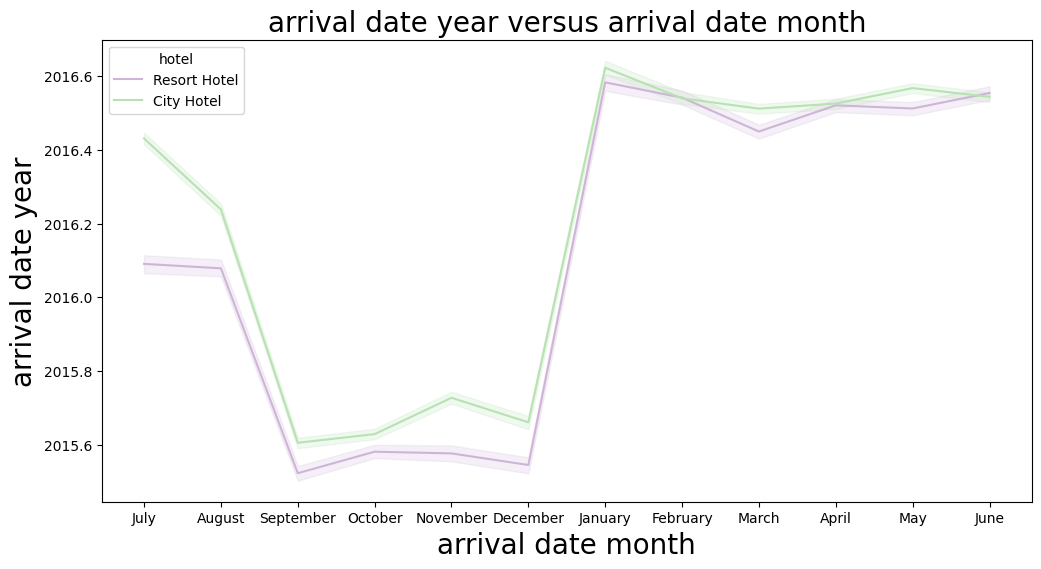

In [ ]:

#arrival date year versus arrival date month
plt.figure(figsize = (12,6))
ax = sns.lineplot(x = 'arrival_date_month', y = 'arrival_date_year' ,hue='hotel',palette='PRGn',data=hotel_df)
ax.set_xlabel('arrival date month', fontsize = 20)
ax.set_ylabel('arrival date year', fontsize = 20)
ax.set_title('arrival date year versus arrival date month', fontsize = 20)
plt.show()

The peak booking period is from the month of may to august, when guests are arriving at hotels. The fewest bookings are made during the months of November through February, when most guests arriving into hotels.
August month is the peak period, where more guest are arriving at city hotel than compare to resort hotel.
August saw the highest number of average daily rate bookings for resort hotels, while november and january month saw the lowest numbers.
Compared to other times of year, summer is the busiest season for hotels, when the majority of guests stay there.

Total nights

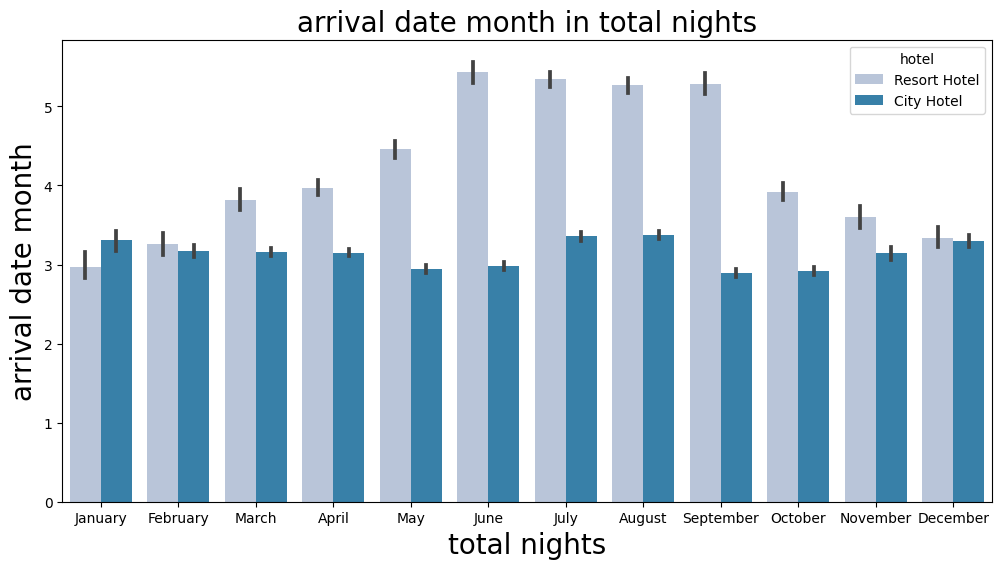

In [ ]:

#stays in weekend night by month
plt.figure(figsize = (12,6))
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
ax = sns.barplot(x = 'arrival_date_month', y = 'total_stays_hotel',hue='hotel',palette='PuBu',order=months,data=hotel_df)
ax.set_xlabel('total nights', fontsize = 20)
ax.set_ylabel('arrival date month', fontsize = 20)
ax.set_title('arrival date month in total nights', fontsize = 20)
plt.show()

Total nights stays are high from June to September at resort hotels.

Total Stays Hotel

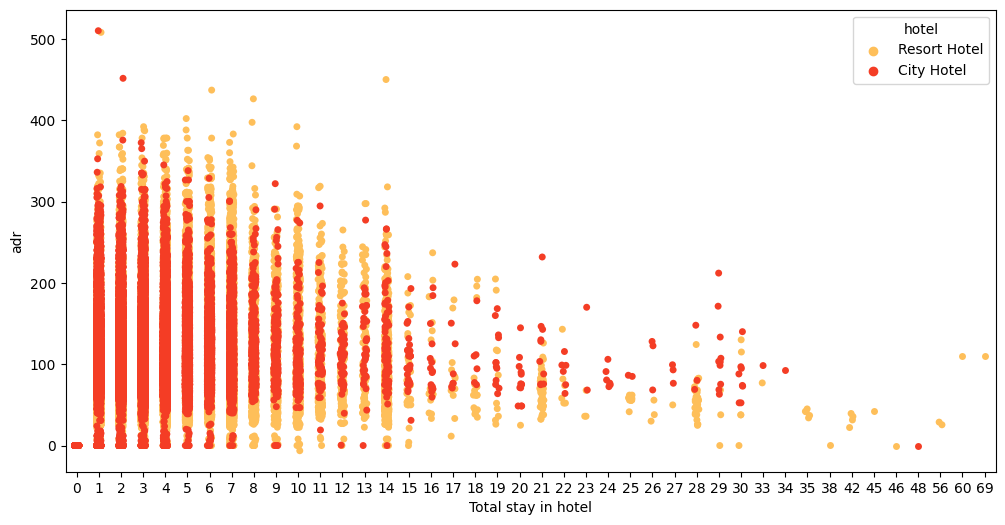

In [ ]:


plt.figure(figsize = (12,6))
sns.stripplot(y = 'adr', x = 'total_stays_hotel',hue='hotel',palette='YlOrRd', data =hotel_df)
plt.xlabel("Total stay in hotel")
plt.show()

Booking type by country

Text(0.5, 1.0, 'Book Hotel type by country')

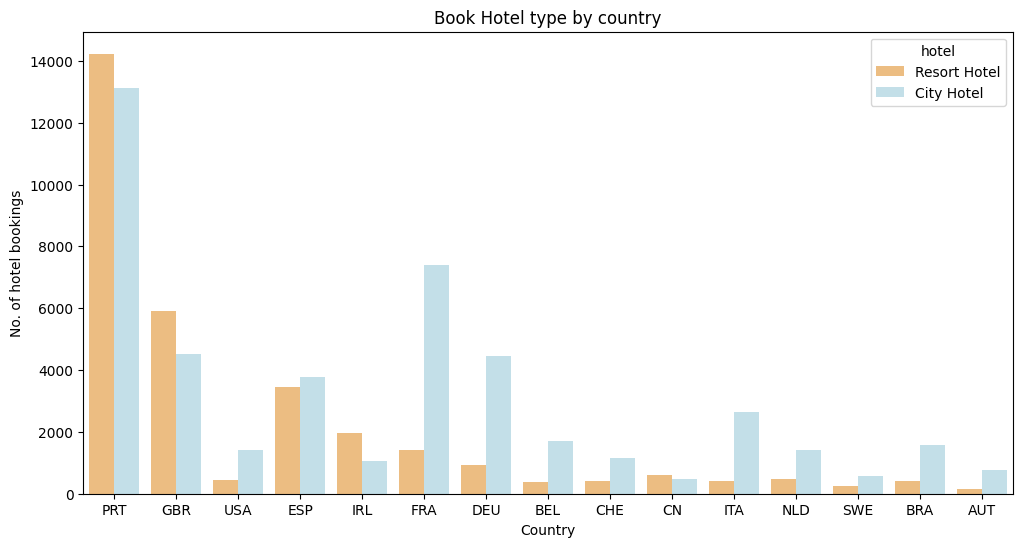

In [ ]:
d = hotel_df['country'].value_counts().sort_values(ascending=False)[:15]
plt.figure(figsize=(12,6))
sns.countplot(x='country', hue='hotel',palette='RdYlBu', data=hotel_df[hotel_df['country'].isin(d.index)])
plt.xlabel("Country")
plt.ylabel("No. of hotel bookings")
plt.title("Book Hotel type by country")

The majority of reservations are made by PRT country, customer from the GBR country, the second-highest bookings for hotels.
Western Europe, specifically Portugal, France, Great Britain, and Spain, has more visitors than any other region.

Meal Type

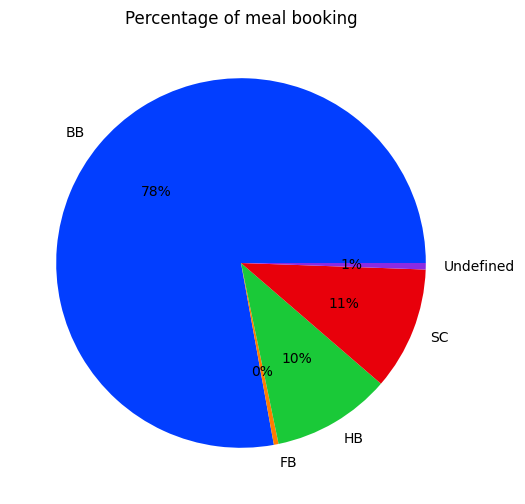

In [ ]:
df_pie = hotel_df.groupby(['meal']).agg({'hotel':'count'}).reset_index()
colors = sns.color_palette('bright')[0:5]
plt.figure(figsize=(12,6))
plt.pie(df_pie['hotel'], labels = df_pie.meal , colors = colors, autopct='%.0f%%')
plt.title('Percentage of meal booking')
plt.show()

The most popular meal is BB (Bed & Breakfast), which accounts for about 77.2% of all orders, followed by HB (Half Board), SC (no meal package), Undefined, and FB (Full Board).
Many people had bed and breakfast as they stayed in hotel at night which means more bookings are from city hotels.

Market Segment

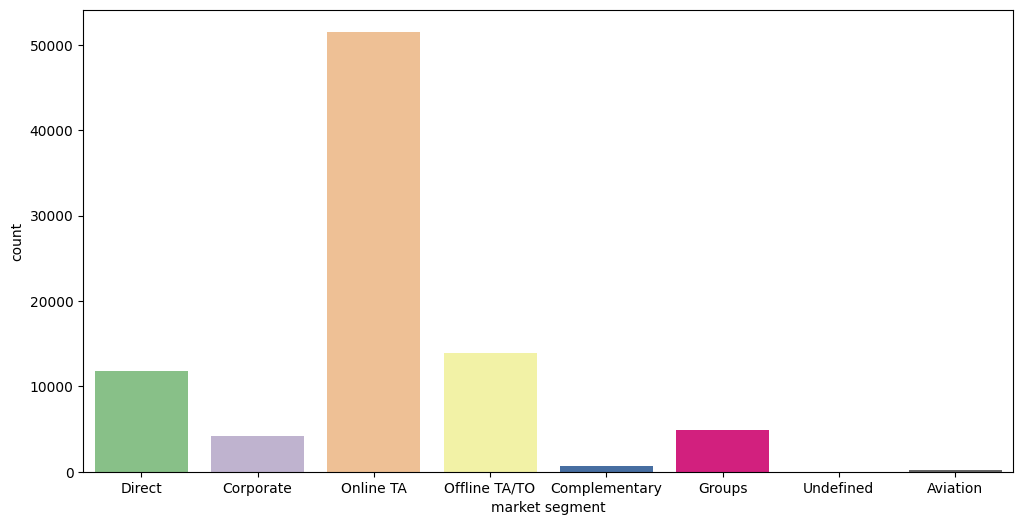

In [ ]:
#Market segment
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'market_segment',palette='Accent',data=hotel_df)
ax.set_xlabel('market segment')
plt.show()

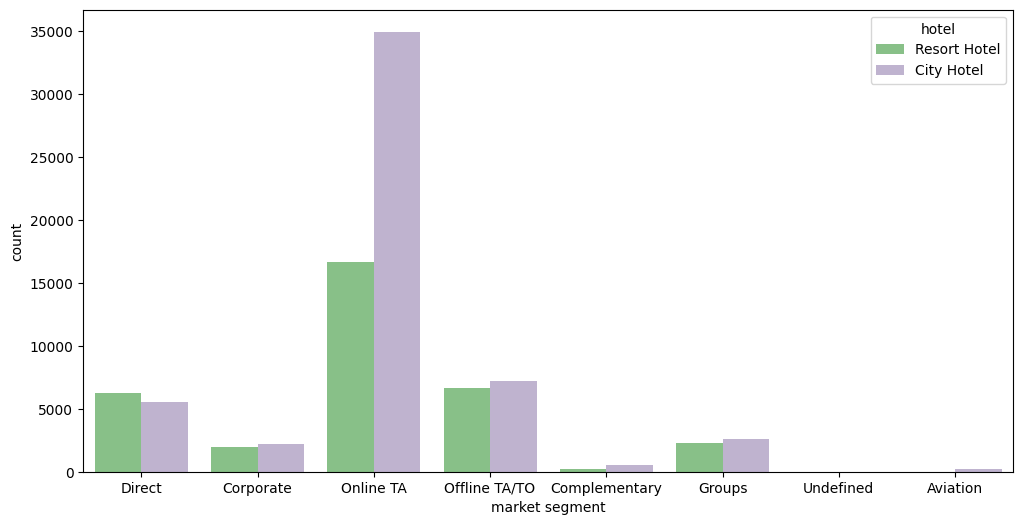

In [ ]:
#Market segment in hotel
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'market_segment',hue='hotel',palette='Accent',data=hotel_df)
ax.set_xlabel('market segment')
plt.show()